In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from kneed import KneeLocator

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score


In [3]:
# 1
df = pd.read_excel('https://github.com/robertasgabrys/DSO559/blob/main/Orders.xlsx?raw=true')
df.shape

(420, 9)

In [4]:
df.columns

Index(['Age', 'Spending', 'NumOrders', 'Indian', 'Chinese', 'Thai', 'Italian',
       'Other', 'JoinDate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        420 non-null    float64
 1   Spending   420 non-null    float64
 2   NumOrders  420 non-null    float64
 3   Indian     420 non-null    float64
 4   Chinese    420 non-null    float64
 5   Thai       420 non-null    float64
 6   Italian    420 non-null    float64
 7   Other      420 non-null    float64
 8   JoinDate   420 non-null    object 
dtypes: float64(8), object(1)
memory usage: 29.7+ KB


In [6]:
df.head()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate
0,29.248825,27.229307,2.955604,4.025227,17.713847,3.955385,0.642557,0.892293,09/04/2014
1,21.841138,28.774165,3.177375,2.597784,8.171490,15.809454,1.528008,0.667430,08/07/2014
2,24.718422,39.969681,1.377491,1.989893,6.038549,4.555131,9.078386,18.307722,11/22/2013
3,21.756908,31.745682,0.943966,18.070805,10.364062,1.215660,0.624555,1.470601,06/12/2014
4,32.813984,35.950385,2.825483,8.601173,8.443659,5.493652,5.548047,7.863855,12/18/2014


In [7]:
# 2
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['Today'] = pd.to_datetime('4/17/2023')
df['Time'] = (df['Today'] - df['JoinDate']).dt.days / 365.25
df['Time'].mean().round(2)

8.82

In [8]:
df.head()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,JoinDate,Today,Time
0,29.248825,27.229307,2.955604,4.025227,17.713847,3.955385,0.642557,0.892293,2014-09-04,2023-04-17,8.616016
1,21.841138,28.774165,3.177375,2.597784,8.171490,15.809454,1.528008,0.667430,2014-08-07,2023-04-17,8.692676
2,24.718422,39.969681,1.377491,1.989893,6.038549,4.555131,9.078386,18.307722,2013-11-22,2023-04-17,9.399042
3,21.756908,31.745682,0.943966,18.070805,10.364062,1.215660,0.624555,1.470601,2014-06-12,2023-04-17,8.845996
4,32.813984,35.950385,2.825483,8.601173,8.443659,5.493652,5.548047,7.863855,2014-12-18,2023-04-17,8.328542


In [9]:
df.columns

Index(['Age', 'Spending', 'NumOrders', 'Indian', 'Chinese', 'Thai', 'Italian',
       'Other', 'JoinDate', 'Today', 'Time'],
      dtype='object')

In [10]:
# 3
df.drop(['JoinDate', 'Today'],axis=1,inplace=True)

In [11]:
scaled_features = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
scaled_features.describe().round(2)

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time
count,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.87,-2.88,-0.70,-1.05,-1.29,-1.20,-0.98,-0.95,-2.41
25%,-0.69,-0.61,-0.51,-0.77,-0.79,-0.86,-0.76,-0.79,-0.63
50%,-0.41,0.12,-0.27,-0.28,-0.25,-0.22,-0.31,-0.44,0.13
75%,0.89,0.74,0.13,0.37,0.61,0.70,0.45,0.57,0.86
max,2.95,2.15,9.99,4.38,3.37,3.34,4.24,3.35,1.32


In [12]:
# 4
K = 12
sse = [KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).inertia_ for k in range(1,K+1)]

In [13]:
KneeLocator(range(1,K+1),sse,curve='convex',direction='decreasing').elbow

5

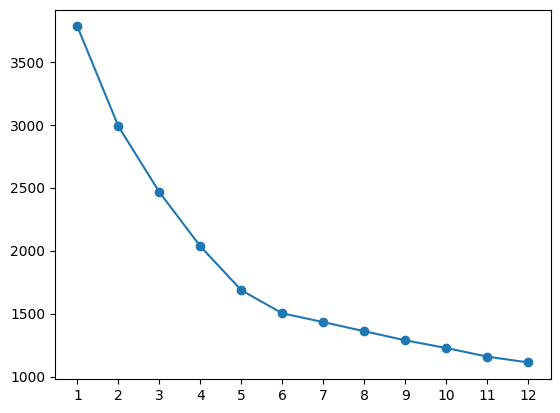

In [14]:
# 5
plt.plot(range(1,K+1),sse,marker='o')
plt.xticks(range(1,K+1))
plt.show()

In [15]:
# 6
scs = [silhouette_score(scaled_features,\
                  KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).labels_) for k in range(2,K+1)]

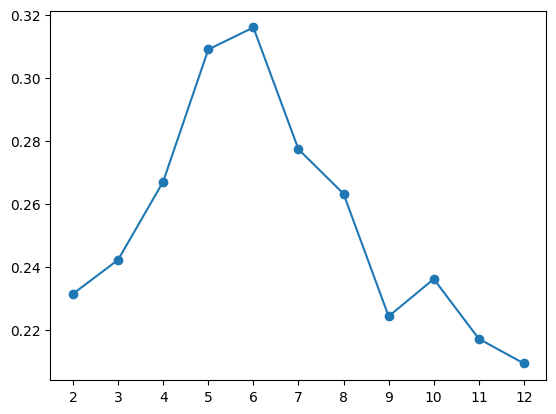

In [16]:
plt.plot(range(2,K+1),scs,marker='o')
plt.xticks(range(2,K+1))
plt.show()

In [17]:
df.head()

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time
0,29.248825,27.229307,2.955604,4.025227,17.713847,3.955385,0.642557,0.892293,8.616016
1,21.841138,28.774165,3.177375,2.597784,8.171490,15.809454,1.528008,0.667430,8.692676
2,24.718422,39.969681,1.377491,1.989893,6.038549,4.555131,9.078386,18.307722,9.399042
3,21.756908,31.745682,0.943966,18.070805,10.364062,1.215660,0.624555,1.470601,8.845996
4,32.813984,35.950385,2.825483,8.601173,8.443659,5.493652,5.548047,7.863855,8.328542


In [18]:
# Build k=5 cluster model and save cluster IDs in a column of the original data frame:
k = 5
df['K=5'] = KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).labels_

In [19]:
# Find mean of each characteristic/feature in each cluster:
df.groupby(['K=5']).mean().round(2)

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time
K=5,,,,,,,,,
0,29.66,40.12,1.41,4.07,4.54,4.19,14.16,13.16,8.30
1,24.63,25.36,2.17,6.25,9.25,5.19,2.49,2.18,8.72
2,29.98,42.32,0.79,15.60,3.09,17.19,2.95,3.49,8.24
3,24.02,44.44,4.65,3.41,16.49,17.01,3.99,3.54,9.19
4,24.06,44.95,3.67,5.85,4.92,4.85,5.42,23.90,9.21


In [20]:
# How accurately average represents customers in each cluster?
# SD = standard deviation measures teh spread around teh mean

df.groupby(['K=5']).std().round(2)

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time
K=5,,,,,,,,,
0,2.32,7.23,1.64,2.92,2.88,3.60,6.51,5.99,0.30
1,2.86,6.32,1.36,4.50,4.23,4.96,2.65,2.06,0.19
2,1.20,6.89,1.03,6.37,2.56,5.84,2.68,3.44,0.29
3,0.61,5.87,5.66,3.37,5.47,6.62,3.56,3.49,0.17
4,0.74,6.50,4.69,5.78,3.92,4.13,3.89,7.66,0.14


In [21]:
# To understand wether a mean is accurate representative of dat points in a cluster we can calculate the coefficient of variantion, CV
# CV = SD / Mean *100
# We use CV in Regression: CV = RMSE / Mean * 100. Rule of thumb: if CV < 10%, predictions are considered to be accurate. 

In [22]:
# 8
k = 6
df['K=6'] = KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).labels_

In [23]:
pd.crosstab(index = df['K=5'], columns = df['K=6']) 

K=6,0,1,2,3,4,5
K=5,,,,,,
0,0,0,66,0,0,0
1,0,0,0,94,0,0
2,0,0,0,0,0,57
3,5,0,1,0,95,1
4,1,100,0,0,0,0


In [24]:
df.groupby(['K=6']).mean().round(2)

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time,K=5
K=6,,,,,,,,,,
0,23.76,48.49,26.30,4.91,17.04,16.37,5.29,4.88,9.26,3.17
1,24.07,44.90,3.32,5.79,4.96,4.77,5.42,23.95,9.21,4.00
2,29.57,40.29,1.51,4.12,4.63,4.30,14.19,13.04,8.31,0.04
3,24.63,25.36,2.17,6.25,9.25,5.19,2.49,2.18,8.72,1.00
4,24.04,44.13,3.61,3.21,16.42,17.16,3.75,3.59,9.20,3.00
5,29.89,42.42,0.86,15.63,3.20,17.04,3.04,3.51,8.25,2.02


In [25]:
df.groupby(['K=5','K=6']).mean().round(2)

Age  Spending  NumOrders  Indian  Chinese   Thai  Italian  Other  \
K=5 K=6                                                                       
0   2    29.66     40.12       1.41    4.07     4.54   4.19    14.16  13.16   
1   3    24.63     25.36       2.17    6.25     9.25   5.19     2.49   2.18   
2   5    29.98     42.32       0.79   15.60     3.09  17.19     2.95   3.49   
3   0    23.78     48.07      23.70    3.52    20.24  16.95     5.27   2.07   
    2    23.05     51.23       8.50    7.51    10.72  11.81    15.94   5.25   
    4    24.04     44.13       3.61    3.21    16.42  17.16     3.75   3.59   
    5    24.35     48.27       4.53   17.02     9.81   8.41     8.31   4.72   
4   0    23.65     50.64      39.28   11.87     1.02  13.46     5.36  18.93   
    1    24.07     44.90       3.32    5.79     4.96   4.77     5.42  23.95   

         Time  
K=5 K=6        
0   2    8.30  
1   3    8.72  
2   5    8.24  
3   0    9.23  
    2    8.41  
    4    9.20  
    5    8.77  
4   0    9.39  
    1    9.21

In [26]:
df.groupby(['K=6','K=5']).mean().round(2)

Age  Spending  NumOrders  Indian  Chinese   Thai  Italian  Other  \
K=6 K=5                                                                       
0   3    23.78     48.07      23.70    3.52    20.24  16.95     5.27   2.07   
    4    23.65     50.64      39.28   11.87     1.02  13.46     5.36  18.93   
1   4    24.07     44.90       3.32    5.79     4.96   4.77     5.42  23.95   
2   0    29.66     40.12       1.41    4.07     4.54   4.19    14.16  13.16   
    3    23.05     51.23       8.50    7.51    10.72  11.81    15.94   5.25   
3   1    24.63     25.36       2.17    6.25     9.25   5.19     2.49   2.18   
4   3    24.04     44.13       3.61    3.21    16.42  17.16     3.75   3.59   
5   2    29.98     42.32       0.79   15.60     3.09  17.19     2.95   3.49   
    3    24.35     48.27       4.53   17.02     9.81   8.41     8.31   4.72   

         Time  
K=6 K=5        
0   3    9.23  
    4    9.39  
1   4    9.21  
2   0    8.30  
    3    8.41  
3   1    8.72  
4   3    9.20  
5   2    8.24  
    3    8.77

In [27]:
# 9
k = 5
df['K=5NoSpending'] = KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features.drop('Spending',axis=1)).labels_

In [28]:
pd.crosstab(index = df['K=5'], columns = df['K=5NoSpending']) 

K=5NoSpending,0,1,2,3,4
K=5,,,,,
0,0,0,5,0,61
1,5,0,89,0,0
2,0,57,0,0,0
3,97,0,5,0,0
4,0,0,2,99,0


In [29]:
df.groupby(['K=5NoSpending']).mean().round(2)

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time,K=5,K=6
K=5NoSpending,,,,,,,,,,,
0,24.07,43.73,4.53,3.02,16.59,17.03,3.66,3.43,9.20,2.90,3.75
1,29.98,42.32,0.79,15.60,3.09,17.19,2.95,3.49,8.24,2.00,5.00
2,24.60,27.02,2.42,6.73,9.03,5.25,3.33,2.68,8.70,1.11,2.95
3,24.07,45.02,3.64,5.77,4.83,4.85,5.40,24.17,9.21,4.00,0.99
4,30.01,40.29,1.25,3.86,4.35,3.99,14.40,13.70,8.28,0.00,2.00


In [30]:
df.groupby(['K=5']).mean().round(2)

,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time,K=6,K=5NoSpending
K=5,,,,,,,,,,,
0,29.66,40.12,1.41,4.07,4.54,4.19,14.16,13.16,8.30,2.00,3.85
1,24.63,25.36,2.17,6.25,9.25,5.19,2.49,2.18,8.72,3.00,1.89
2,29.98,42.32,0.79,15.60,3.09,17.19,2.95,3.49,8.24,5.00,1.00
3,24.02,44.44,4.65,3.41,16.49,17.01,3.99,3.54,9.19,3.79,0.10
4,24.06,44.95,3.67,5.85,4.92,4.85,5.42,23.90,9.21,0.99,2.98


In [31]:
df.groupby(['K=5','K=5NoSpending']).mean().round(2)

Age  Spending  NumOrders  Indian  Chinese   Thai  \
K=5 K=5NoSpending                                                       
0   2              25.44     38.00       3.37    6.67     6.88   6.66   
    4              30.01     40.29       1.25    3.86     4.35   3.99   
1   0              24.39     29.68       2.55    0.98    14.16   9.97   
    2              24.64     25.12       2.15    6.55     8.97   4.93   
2   1              29.98     42.32       0.79   15.60     3.09  17.19   
3   0              24.06     44.45       4.63    3.13    16.72  17.39   
    2              23.33     44.10       4.94    8.76    12.01   9.76   
4   2              23.51     41.64       5.48    9.98     9.55   4.86   
    3              24.07     45.02       3.64    5.77     4.83   4.85   

                   Italian  Other  Time   K=6  
K=5 K=5NoSpending                              
0   2                11.24   6.54  8.54  2.00  
    4                14.40  13.70  8.28  2.00  
1   0                 2.51   2.05  9.01  3.00  
    2                 2.49   2.19  8.70  3.00  
2   1                 2.95   3.49  8.24  5.00  
3   0                 3.72   3.50  9.21  3.79  
    2                 9.16   4.42  8.73  3.80  
4   2                 6.57  10.69  8.93  1.00  
    3                 5.40  24.17  9.21  0.99

In [32]:
# 9
df.groupby(['K=5']).mean().round(2)


,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time,K=6,K=5NoSpending
K=5,,,,,,,,,,,
0,29.66,40.12,1.41,4.07,4.54,4.19,14.16,13.16,8.30,2.00,3.85
1,24.63,25.36,2.17,6.25,9.25,5.19,2.49,2.18,8.72,3.00,1.89
2,29.98,42.32,0.79,15.60,3.09,17.19,2.95,3.49,8.24,5.00,1.00
3,24.02,44.44,4.65,3.41,16.49,17.01,3.99,3.54,9.19,3.79,0.10
4,24.06,44.95,3.67,5.85,4.92,4.85,5.42,23.90,9.21,0.99,2.98


In [33]:
df[['Spending','NumOrders','K=5']].groupby(['K=5']).count()

,Spending,NumOrders
K=5,,
0,66,66
1,94,94
2,57,57
3,102,102
4,101,101


In [34]:
# 11
df_pricing = df[['Spending','NumOrders','K=5']].groupby(['K=5']).agg({'Spending':['mean','count'],'NumOrders':'mean'}).round(2)
df_pricing

Spending       NumOrders
        mean count      mean
K=5                         
0      40.12    66      1.41
1      25.36    94      2.17
2      42.32    57      0.79
3      44.44   102      4.65
4      44.95   101      3.67

In [35]:
df_pricing.columns

MultiIndex([( 'Spending',  'mean'),
            ( 'Spending', 'count'),
            ('NumOrders',  'mean')],
           )

In [36]:
df_pricing = df_pricing.droplevel(level=1,axis=1)

In [37]:
df_pricing.columns = ['Spending', 'Count', 'NumOrders']

In [38]:
df_pricing['10pctOfAlllTransactions'] = df_pricing['Spending'] * 0.1    # Old pricing 
df_pricing['1.5PerTransaction'] = df_pricing['NumOrders'] * 1.5          # New pricing

df_pricing['GainLoss'] = df_pricing['1.5PerTransaction'] - df_pricing['10pctOfAlllTransactions']

df_pricing

,Spending,Count,NumOrders,10pctOfAlllTransactions,1.5PerTransaction,GainLoss
K=5,,,,,,
0,40.12,66,1.41,4.012,2.115,-1.897
1,25.36,94,2.17,2.536,3.255,0.719
2,42.32,57,0.79,4.232,1.185,-3.047
3,44.44,102,4.65,4.444,6.975,2.531
4,44.95,101,3.67,4.495,5.505,1.010


In [39]:
df_pricing['TotalGainLoss'] =df_pricing['Count'] * df_pricing['GainLoss']
df_pricing.round(2)

,Spending,Count,NumOrders,10pctOfAlllTransactions,1.5PerTransaction,GainLoss,TotalGainLoss
K=5,,,,,,,
0,40.12,66,1.41,4.01,2.11,-1.90,-125.20
1,25.36,94,2.17,2.54,3.26,0.72,67.59
2,42.32,57,0.79,4.23,1.18,-3.05,-173.68
3,44.44,102,4.65,4.44,6.98,2.53,258.16
4,44.95,101,3.67,4.50,5.50,1.01,102.01


In [40]:
df_pricing['TotalGainLoss'].sum().round(2)

128.88

In [41]:
# Create 2 new columns thatrepresent CH revenue using old and new pricing schemes:

df_pricing['TotalRevenueOld'] = df_pricing['Count'] * df_pricing['10pctOfAlllTransactions']
df_pricing['TotalRevenueNew'] = df_pricing['Count'] * df_pricing['1.5PerTransaction']
df_pricing['TotalGainLoss'].sum() / df_pricing['TotalRevenueOld'].sum() *100

7.8027684489093865

In [42]:
df_pricing.loc[df_pricing['TotalGainLoss']>0,'TotalGainLoss'].sum() / df_pricing['TotalRevenueOld'].sum() *100

25.898310995511853

In [43]:
# Create a parallel coo0rdinat eplot to visulize clustering, i.e. 1) all customers, 2) cluster centers

scaled_features['K=5'] = df['K=5']

In [44]:
means = scaled_features.groupby(['K=5']).mean().reset_index()

In [45]:
means

,K=5,Age,Spending,NumOrders,Indian,Chinese,Thai,Italian,Other,Time
0,0,1.228317,0.079193,-0.357017,-0.384066,-0.593604,-0.667976,1.564919,0.348031,-1.139013
1,1,-0.398525,-1.392737,-0.164617,-0.023148,0.132367,-0.540456,-0.532707,-0.736845,-0.227801
2,2,1.331717,0.298560,-0.510792,1.524619,-0.817107,0.982236,-0.450249,-0.607813,-1.286534
3,3,-0.595303,0.509724,0.457372,-0.494237,1.248174,0.959378,-0.263938,-0.601968,0.816153
4,4,-0.582125,0.561196,0.212874,-0.088781,-0.534686,-0.583710,-0.006181,1.409302,0.858149


In [46]:
from pandas.plotting import parallel_coordinates

<Axes: >

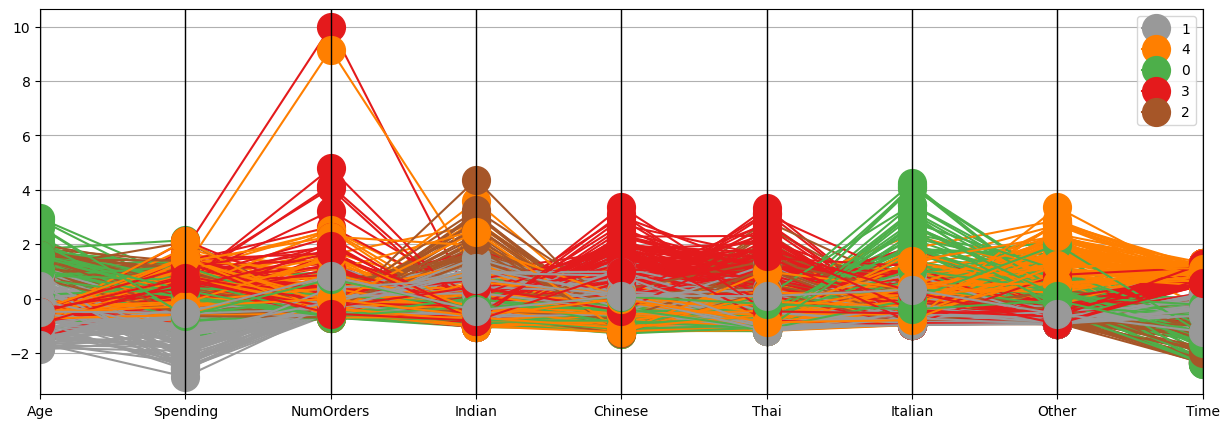

In [47]:
plt.figure(figsize=(15,5))
parallel_coordinates(scaled_features, 'K=5',colormap = 'Set1', sort_labels = True, marker ='o' ,markersize =20)